# Sample text (sentences) clustering

In [1]:
% matplotlib inline
import os, sys
from functools import partial
import pandas
import numpy as np
import matplotlib.pyplot as plt

sys.path += [os.path.abspath('.'), os.path.abspath('..')]
import seqclust.utilities as utils
import seqclust.distances as sq_dist
import seqclust.clustering as sq_clust

## Sample text

In [2]:
text = '''
Hi there, how are you?
hi how you are
i like to sing
I am going to sing
hi where you are
hi are you there...
do you sing???'''

split the text by lines assuming each line is sentence and tokenise each sentence

In [3]:
sentences = [utils.sentence_tokenize(l) for l in text.split('\n') if len(l) > 0]
print (sentences)

[['hi', 'there', 'how', 'are', 'you'], ['hi', 'how', 'you', 'are'], ['i', 'like', 'to', 'sing'], ['i', 'am', 'going', 'to', 'sing'], ['hi', 'where', 'you', 'are'], ['hi', 'are', 'you', 'there'], ['do', 'you', 'sing']]


## Agglomerative clustering

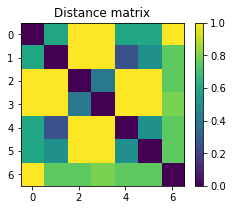

In [4]:
cost_affinity = partial(sq_dist.sequence_distance, element_dist=sq_dist.elements_distance_binary)
dist_mx = sq_dist.compute_seq_distances(sentences, affinity=cost_affinity)
_= plt.figure(figsize=(4, 3)), plt.imshow(dist_mx), plt.colorbar(), plt.title('Distance matrix')

In [5]:
clust = sq_clust.AgglomerativeClustering(nb_clusters=3, fn_affinity=sq_dist.sequence_distance)
clust.fit(sentences)

## Show results

In [6]:
str_sentences = [' '.join(s) for s in sentences]
results = list(zip(clust.labels_, str_sentences))
pandas.DataFrame(results, columns=['label', 'sentence'])

,label,sentence
0,0,hi there how are you
1,0,hi how you are
2,1,i like to sing
3,1,i am going to sing
4,0,hi where you are
5,0,hi are you there
6,2,do you sing


In [7]:
results = list(zip(np.asarray(str_sentences)[clust.cluster_pivots_], clust.clusters_, clust.inter_dist_))
pandas.DataFrame(results, columns=['sentence', 'clusters', 'internal dist.'])

,sentence,clusters,internal dist.
0,hi how you are,"[0, 1, 4, 5]",0.095313
1,i like to sing,"[2, 3]",0.100000
2,do you sing,[6],0.000000


In [12]:
lb, dist = clust.predict(utils.sentence_tokenize('hello how you are'))
print('prediction is cluster %i with distance %.3f' % (lb, dist))

prediction is cluster 0 with distance 0.250
